In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import os
import fastparquet
import geopandas as gpd
from shapely.geometry import Point
from bokeh.plotting import figure, show
import plotly.express as px
from plotly.offline import iplot
%matplotlib inline
import fiona

In [2]:
path="F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/Dataset_for_Map/Exploration_Data_for_Map.parquet"
# Testing the Parquet Files
df=pd.read_parquet(path=path,engine="fastparquet")
df

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
index                                                              
0       2009-05-04 00:45:40 2009-05-04 00:49:59                1   
1       2009-12-18 19:11:35 2009-12-18 20:05:53                1   
2       2009-09-10 23:43:00 2009-09-10 23:55:00                5   
3       2009-06-15 20:59:00 2009-06-15 21:07:00                1   
4       2009-09-16 15:30:20 2009-09-16 15:58:29                1   
5       2009-10-12 12:16:00 2009-10-12 12:27:00                2   
6       2009-04-19 12:33:56 2009-04-19 12:48:56                3   
7       2009-10-19 08:09:02 2009-10-19 08:26:46                1   
8       2009-06-20 17:35:00 2009-06-20 17:44:00                1   
9       2009-10-07 08:13:51 2009-10-07 08:29:59                2   
10      2009-10-09 18:29:00 2009-10-09 18:45:00                1   
11      2009-10-22 19:23:00 2009-10-22 19:27:00                1   
12      2009-03-08 02:13:59 2009-03-08 02:22:45                2   
13      2009-09-02 13:19:00 2009-09-02 13:25:00                3   
14      2009-03-01 01:15:00 2009-03-01 01:26:00                3   
15      2009-09-24 15:10:25 2009-09-24 15:30:47                1   
16      2009-01-07 03:22:41 2009-01-07 03:29:19                2   
17      2009-08-04 12:51:00 2009-08-04 13:03:00                5   
18      2009-03-18 09:53:33 2009-03-18 09:59:26                1   
19      2009-12-21 12:38:22 2009-12-21 12:50:18                1   
20      2009-09-02 11:19:00 2009-09-02 11:28:00                1   
21      2009-04-23 19:07:00 2009-04-23 19:53:00                5   
22      2009-10-25 13:59:51 2009-10-25 14:10:40                1   
23      2009-08-17 07:47:00 2009-08-17 07:53:00                5   
24      2009-02-03 06:33:36 2009-02-03 06:41:32                1   
25      2009-02-16 00:01:00 2009-02-16 00:04:00                1   
26      2009-11-22 15:09:00 2009-11-22 15:16:00                1   
27      2009-04-10 12:22:00 2009-04-10 12:29:00                5   
28      2009-04-16 07:48:41 2009-04-16 07:52:45                2   
29      2009-02-15 13:03:00 2009-02-15 13:10:00                1   
...                     ...                 ...              ...   
1999969 2016-04-19 08:40:22 2016-04-19 08:46:51                1   
1999970 2016-04-26 14:21:08 2016-04-27 14:06:42                6   
1999971 2016-04-14 23:09:16 2016-04-14 23:17:42                1   
1999972 2016-02-27 22:53:30 2016-02-27 23:18:12                1   
1999973 2016-05-12 09:23:16 2016-05-12 09:29:56                1   
1999974 2016-01-06 06:55:55 2016-01-06 07:10:13                1   
1999975 2016-05-13 21:05:11 2016-05-13 21:27:58                1   
1999977 2016-01-14 19:37:12 2016-01-14 19:46:21                5   
1999978 2016-05-05 19:11:20 2016-05-05 19:19:55                1   
1999979 2016-02-10 13:32:30 2016-02-10 13:49:05                6   
1999980 2016-05-30 01:10:43 2016-05-30 01:31:18                5   
1999981 2016-04-19 15:13:43 2016-04-19 15:20:15                1   
1999982 2016-01-13 23:23:57 2016-01-13 23:37:36                1   
1999983 2016-04-17 02:35:35 2016-04-17 02:45:34                5   
1999984 2016-03-24 11:29:21 2016-03-24 11:46:42                1   
1999985 2016-03-17 19:34:24 2016-03-17 19:49:57                1   
1999986 2016-05-24 06:17:52 2016-05-24 06:20:07                1   
1999987 2016-05-19 00:34:37 2016-05-19 00:49:34                2   
1999988 2016-05-28 19:01:41 2016-05-28 19:23:29                1   
1999989 2016-05-07 01:34:31 2016-05-07 01:40:30                2   
1999990 2016-04-09 23:53:40 2016-04-10 00:22:12                1   
1999991 2016-03-03 02:33:16 2016-03-03 02:47:29                1   
1999992 2016-01-21 09:48:45 2016-01-21 10:00:05                5   
1999993 2016-03-14 20:11:10 2016-03-14 20:20:19                2   
1999994 2016-03-07 18:45:25 2016-03-07 18:54:56                1   
1999995 2016-06-08 17:45:20 2016-06-08 17:51:48                1   


### 4.1 Rides on Map of New York City

### Heatmap of Pickup and Dropoff Location

In [3]:
# Create Dataframes for Pickup and Dropoff Location
df_pickup_location=df[["Pickup_Lat","Pickup_Lon"]]
df_dropoff_location=df[["Dropoff_Lat","Dropoff_Lon"]]

# Sample 3200 random Datapoints for Plotting on Map, because there is an error we if we take all
pickup_sample=df_pickup_location.sample(n=3200,random_state=1)
dropoff_sample=df_dropoff_location.sample(n=3200,random_state=1)

pickup_sample.head()

Pickup_Lat  Pickup_Lon
index                          
1360255   40.735214  -74.006096
1525741   40.737442  -73.984184
13153     40.770763  -73.961830
1649625   40.761753  -73.960388
1807281   40.746307  -73.990295

In [4]:
########################Lat,Lon#################################
m_pickup = folium.Map(location=[40.730610, -73.935242])

for row in pickup_sample.itertuples(index=False):

    folium.CircleMarker(
        location=[row[0],row[1]],
        radius=1,
        color="red",
        fill=True,
        fill_opacity=0.5
    ).add_to(m_pickup)

In [5]:
########################Lat,Lon#################################
m_dropoff = folium.Map(location=[40.730610, -73.935242])

for row in pickup_sample.itertuples(index=False):

    folium.CircleMarker(
        location=[row[0],row[1]],
        radius=1,
        color="blue",
        fill=True,
        fill_opacity=0.5
    ).add_to(m_dropoff)

### Pickups in New York City

In [6]:
m_pickup

#### Observation:
#### 1. The most pickups are in Manhatten
#### 2. but there is also a significant Amount of Pickups in JFK Airport and LaGuardia Airport
#### 3. Some Pickups are in Water -> Outliers

### Dropoffs in New York City

In [7]:
m_dropoff

#### Observation:
#### 1. The most dropoffs are in Manhatten
#### 2. but there is also a significant Amount of Dropoffs in JFK Airport and LaGuardia Airport
#### 3. Some Dropoffs are in Water -> Outliers

### Remove Pickup and Dropoffs in Water Outliers

##### To remove the Pickups and Dropoffs in Water we use geopandas and the shapefile for Taxi zones and Boroughs
##### Should split into 2 Geodataframes -> Pickupdataframe and Dropoffsdataframe, because Pickup and Dropoffs are not necessarily in same Borough or Area

In [8]:
# Geopandas= GeoPandas adds a spatial geometry data type to Pandas and enables spatial operations on these types, using shapely
#It’s worth noting that a GeoDataFrame can be described as a Feature Collection, where each row is a Feature, a geometry column is defined (thought the name of the column doesn’t have to be “geometry”), and the attribute Properties includes the other columns (the Pandas DataFrame part, if you will).

start_location = [Point(xy) for xy in zip(df["Pickup_Lon"], df["Pickup_Lat"])]
end_location = [Point(xy) for xy in zip(df["Dropoff_Lon"], df["Dropoff_Lat"])]
# the coordinate reference system (crs) is specified to WGS 84 / epsg:4326
crs={"init": "epsg:4326"}
pickup_gdf=gpd.GeoDataFrame(df, crs=crs, geometry=start_location, copy=True)
dropoff_gdf=gpd.GeoDataFrame(df, crs=crs, geometry=end_location, copy=True)
pickup_gdf.head()

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  Trip_Distance  \
index                                                                           
0     2009-05-04 00:45:40 2009-05-04 00:49:59                1       0.700195   
1     2009-12-18 19:11:35 2009-12-18 20:05:53                1      19.296875   
2     2009-09-10 23:43:00 2009-09-10 23:55:00                5       1.570312   
3     2009-06-15 20:59:00 2009-06-15 21:07:00                1       1.500000   
4     2009-09-16 15:30:20 2009-09-16 15:58:29                1       2.400391   

       Pickup_Lon  Pickup_Lat  RateCodeID  Dropoff_Lon  Dropoff_Lat  \
index                                                                 
0      -73.987068   40.756031           0   -73.977425    40.749626   
1      -74.014847   40.711170           0   -73.776382    40.646065   
2      -73.991966   40.725288           0   -74.009697    40.710354   
3      -73.955482   40.779682           0   -73.979057    40.789425   
4      -73.980927   40.770405           0   -74.006332    40.751778   

        Fare_Amt                                      geometry  
index                                                           
0       4.500000  POINT (-73.98706817626953 40.75603103637695)  
1      45.000000   POINT (-74.01484680175781 40.7111701965332)  
2       8.101562  POINT (-73.99196624755859 40.72528839111328)  
3       6.898438  POINT (-73.95548248291016 40.77968215942383)  
4       7.300781  POINT (-73.98092651367188 40.77040481567383)

In [9]:
dropoff_gdf.head()

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  Trip_Distance  \
index                                                                           
0     2009-05-04 00:45:40 2009-05-04 00:49:59                1       0.700195   
1     2009-12-18 19:11:35 2009-12-18 20:05:53                1      19.296875   
2     2009-09-10 23:43:00 2009-09-10 23:55:00                5       1.570312   
3     2009-06-15 20:59:00 2009-06-15 21:07:00                1       1.500000   
4     2009-09-16 15:30:20 2009-09-16 15:58:29                1       2.400391   

       Pickup_Lon  Pickup_Lat  RateCodeID  Dropoff_Lon  Dropoff_Lat  \
index                                                                 
0      -73.987068   40.756031           0   -73.977425    40.749626   
1      -74.014847   40.711170           0   -73.776382    40.646065   
2      -73.991966   40.725288           0   -74.009697    40.710354   
3      -73.955482   40.779682           0   -73.979057    40.789425   
4      -73.980927   40.770405           0   -74.006332    40.751778   

        Fare_Amt                                      geometry  
index                                                           
0       4.500000  POINT (-73.97742462158203 40.74962615966797)  
1      45.000000  POINT (-73.77638244628906 40.64606475830078)  
2       8.101562  POINT (-74.00969696044922 40.71035385131836)  
3       6.898438  POINT (-73.97905731201172 40.78942489624023)  
4       7.300781  POINT (-74.00633239746094 40.75177764892578)

In [10]:
# Read ShapeFile of New York City that will later be joines with Geodataframes
nyc_zones=gpd.read_file("F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/taxi_zones.shp")
nyc_zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.9183527103 192536.0856972019,...  
1         Queens  (POLYGON ((1033269.243591294 172126.0078125, 1...  
2          Bronx  POLYGON ((1026308.769506663 256767.6975403726,...  
3      Manhattan  POLYGON ((992073.4667968601 203714.0759887695,...  
4  Staten Island  POLYGON ((935843.3104932606 144283.335850656, ...

In [11]:
type(nyc_zones)

geopandas.geodataframe.GeoDataFrame

In [12]:
#Drop columns that are not to be used:
nyc_zones=nyc_zones.drop(columns=["OBJECTID","Shape_Leng","Shape_Area","LocationID"])
print(nyc_zones.crs)

{'init': 'epsg:2263'}


In [13]:
nyc_zones.head()

zone        borough  \
0           Newark Airport            EWR   
1              Jamaica Bay         Queens   
2  Allerton/Pelham Gardens          Bronx   
3            Alphabet City      Manhattan   
4            Arden Heights  Staten Island   

                                            geometry  
0  POLYGON ((933100.9183527103 192536.0856972019,...  
1  (POLYGON ((1033269.243591294 172126.0078125, 1...  
2  POLYGON ((1026308.769506663 256767.6975403726,...  
3  POLYGON ((992073.4667968601 203714.0759887695,...  
4  POLYGON ((935843.3104932606 144283.335850656, ...

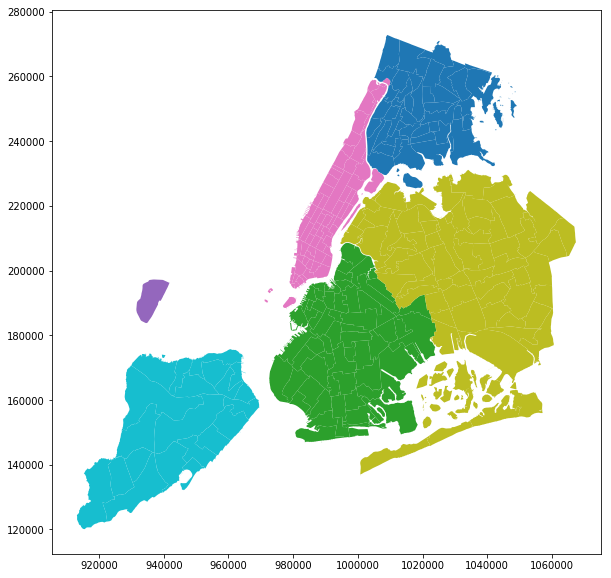

In [14]:
nyc_zones.plot(column="borough",figsize=(10,10))

In [15]:
# The Coordinate Reference System of the shapefile is epsg:2263, we have to transform back to epsg:4326
nyc_zones=nyc_zones.to_crs(crs={'init': 'epsg:4326'})
print(nyc_zones.crs)

{'init': 'epsg:4326'}


In [16]:
nyc_zones.head()

zone        borough  \
0           Newark Airport            EWR   
1              Jamaica Bay         Queens   
2  Allerton/Pelham Gardens          Bronx   
3            Alphabet City      Manhattan   
4            Arden Heights  Staten Island   

                                            geometry  
0  POLYGON ((-74.18445299999996 40.69499599999989...  
1  (POLYGON ((-73.82337597260663 40.6389870471767...  
2  POLYGON ((-73.84792614099985 40.8713422339999,...  
3  POLYGON ((-73.97177410965318 40.72582128133705...  
4  POLYGON ((-74.17421738099989 40.56256808599987...

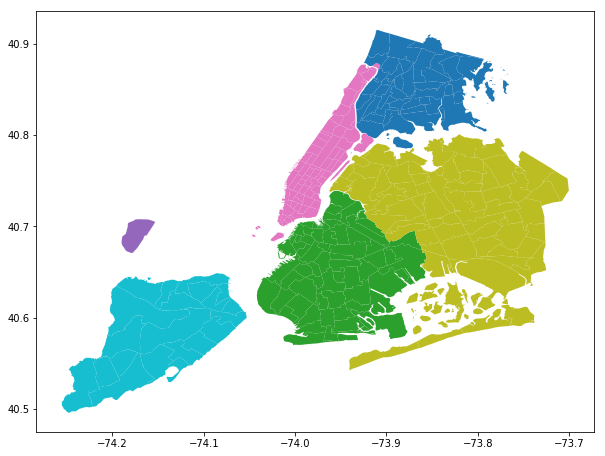

In [17]:
nyc_zones.plot(column="borough",figsize=(10,10))

In [18]:
# Now that the same coordinate reference system is used for the geodataframes and the shapefile, spatial joining can be performed to create the GeoDataFrame gdf.
#sjoin=Spatial Join, how=The how argument specifies the type of join that will occur and which geometry is retained in the resultant geodataframe. 
#op=The `op argument specifies how geopandas decides whether or not to join the attributes of one object to another.
#intersects=The attributes will be joined if the boundary and interior of the object intersect in any way with the boundary and/or interior of the other object.

pickup_with_borough = (gpd.sjoin(pickup_gdf, nyc_zones, how="left", op='intersects')
    .drop(['Dropoff_Lon', 'Dropoff_Lat'],axis='columns'))

dropoff_with_borough = gpd.sjoin(dropoff_gdf[['Dropoff_Lon', 'Dropoff_Lat','geometry']],
    nyc_zones, how="left", op='intersects')

gdf = pickup_with_borough.join(dropoff_with_borough,lsuffix='_pickup',rsuffix='_dropoff')

#Drop some columns
gdf=gdf.drop(columns=['index_right_pickup','index_right_dropoff'])
#Could perhaps also drop the latitude and longitude coordinates as these are cointained within
#geometry_pickup and geometry_dropoff.
gdf.head()

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  Trip_Distance  \
0 2009-05-04 00:45:40 2009-05-04 00:49:59                1       0.700195   
1 2009-12-18 19:11:35 2009-12-18 20:05:53                1      19.296875   
2 2009-09-10 23:43:00 2009-09-10 23:55:00                5       1.570312   
3 2009-06-15 20:59:00 2009-06-15 21:07:00                1       1.500000   
4 2009-09-16 15:30:20 2009-09-16 15:58:29                1       2.400391   

   Pickup_Lon  Pickup_Lat  RateCodeID   Fare_Amt  \
0  -73.987068   40.756031           0   4.500000   
1  -74.014847   40.711170           0  45.000000   
2  -73.991966   40.725288           0   8.101562   
3  -73.955482   40.779682           0   6.898438   
4  -73.980927   40.770405           0   7.300781   

                                geometry_pickup            zone_pickup  \
0  POINT (-73.98706817626953 40.75603103637695)       Garment District   
1   POINT (-74.01484680175781 40.7111701965332)      Battery Park City   
2  POINT (-73.99196624755859 40.72528839111328)           East Village   
3  POINT (-73.95548248291016 40.77968215942383)  Upper East Side North   
4  POINT (-73.98092651367188 40.77040481567383)    Lincoln Square East   

  borough_pickup  Dropoff_Lon  Dropoff_Lat  \
0      Manhattan   -73.977425    40.749626   
1      Manhattan   -73.776382    40.646065   
2      Manhattan   -74.009697    40.710354   
3      Manhattan   -73.979057    40.789425   
4      Manhattan   -74.006332    40.751778   

                               geometry_dropoff               zone_dropoff  \
0  POINT (-73.97742462158203 40.74962615966797)                Murray Hill   
1  POINT (-73.77638244628906 40.64606475830078)                JFK Airport   
2  POINT (-74.00969696044922 40.71035385131836)         World Trade Center   
3  POINT (-73.97905731201172 40.78942489624023)      Upper West Side North   
4  POINT (-74.00633239746094 40.75177764892578)  West Chelsea/Hudson Yards   

  borough_dropoff  
0       Manhattan  
1          Queens  
2       Manhattan  
3       Manhattan  
4       Manhattan

#### Now we have a GeoDataframe with the Boroughs and Taxi Zones

In [19]:
gdf.shape

(1942123, 16)

In [20]:
gdf.dtypes

Pickup_DateTime     datetime64[ns]
Dropoff_DateTime    datetime64[ns]
Passenger_Count              uint8
Trip_Distance              float32
Pickup_Lon                 float32
Pickup_Lat                 float32
RateCodeID                   uint8
Fare_Amt                   float32
geometry_pickup             object
zone_pickup                 object
borough_pickup              object
Dropoff_Lon                float32
Dropoff_Lat                float32
geometry_dropoff            object
zone_dropoff                object
borough_dropoff             object
dtype: object

#### Look for NaN Values in Columns

In [21]:
gdf.isnull().sum()

Pickup_DateTime        0
Dropoff_DateTime       0
Passenger_Count        0
Trip_Distance          0
Pickup_Lon             0
Pickup_Lat             0
RateCodeID             0
Fare_Amt               0
geometry_pickup        0
zone_pickup         3985
borough_pickup      3985
Dropoff_Lon            0
Dropoff_Lat            0
geometry_dropoff       0
zone_dropoff        5934
borough_dropoff     5934
dtype: int64

#### Borough and Zones of Pickup and Dropoffs have some NaN Values

In [22]:
num_entries=1942123
percent=(gdf["borough_pickup"].isnull().sum() / num_entries)*100
print(str(percent) + "%"+ " "+ "Pickups are out of Boroughs")

0.2051878279594032% Pickups are out of Boroughs


In [23]:
num_entries=1942123
percent=(gdf["borough_dropoff"].isnull().sum() / num_entries)*100
print(str(percent) + "%"+ " "+ "Dropoffs are out of Boroughs")

0.30554192499651156% Dropoffs are out of Boroughs


#### Plotting those NaN Values of Boroughs Points

Text(0.5, 1.0, 'Taxi Pickups outside of Borough')

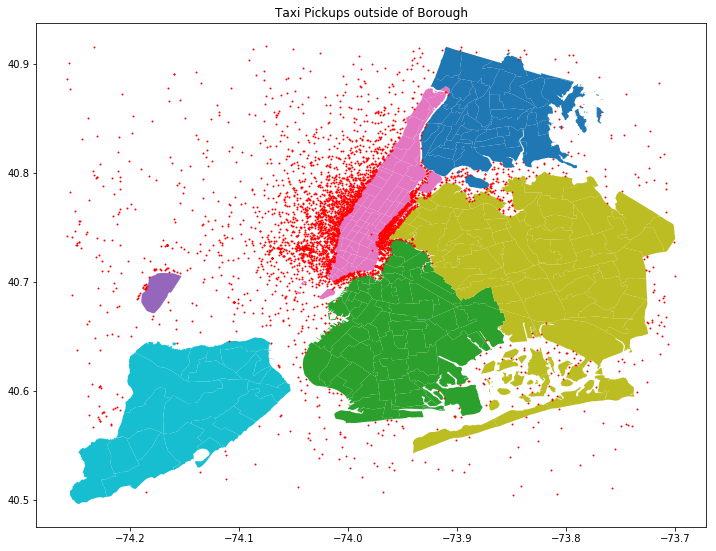

In [24]:
f,ax=plt.subplots(figsize=(12,12))
nyc_zones.plot(column='borough',ax=ax)
gdf.set_geometry('geometry_pickup')[gdf['borough_pickup'].isna()].plot(color='r', markersize=0.9,ax=ax)
plt.title('Taxi Pickups outside of Borough')

#### Observation: Many Pickup Locations are in the water or outside of the Boroughs of NYC
#### Conclusion: Drop those datapoints, because they are outside of New York City

Text(0.5, 1.0, 'Taxi Dropoffs outside of Borough')

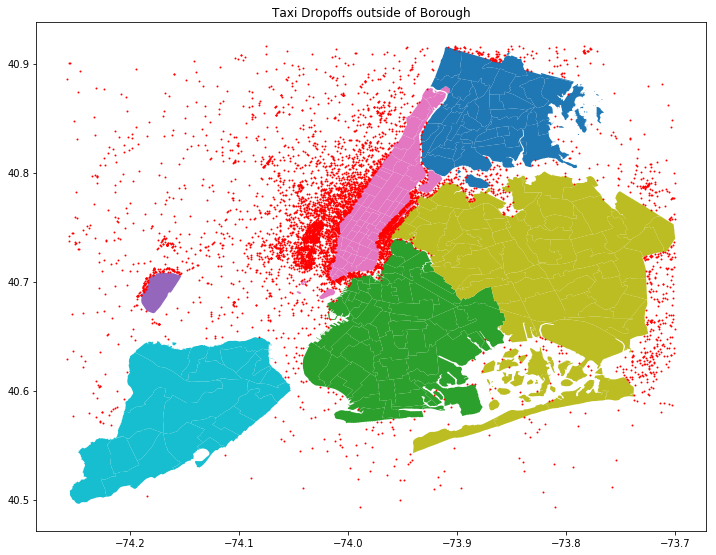

In [25]:
f,ax=plt.subplots(figsize=(12,12))
nyc_zones.plot(column='borough',ax=ax)
gdf.set_geometry('geometry_dropoff')[gdf['borough_dropoff'].isna()].plot(color='r', markersize=0.9,ax=ax)
plt.title('Taxi Dropoffs outside of Borough')

#### Observation: Also many Dropoff Locations are outside of Boroughs of New York City or in water
#### Conclusion: Drop those datapoints, because they are outside of New York City

In [26]:
gdf.loc[gdf["borough_pickup"].isna()]

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  \
239     2009-09-27 05:31:00 2009-09-27 05:52:00                5   
727     2009-07-21 14:17:00 2009-07-21 14:36:00                1   
742     2009-11-04 16:39:00 2009-11-04 16:45:00                1   
836     2009-07-16 15:25:15 2009-07-16 16:04:48                2   
1301    2009-04-07 11:35:00 2009-04-07 11:47:00                1   
1547    2009-05-07 20:02:00 2009-05-07 20:06:00                3   
1563    2009-03-11 11:25:00 2009-03-11 11:34:00                2   
1914    2009-03-28 03:25:00 2009-03-28 03:29:00                1   
2251    2009-05-19 03:58:34 2009-05-19 04:00:48                1   
2436    2009-11-21 19:09:00 2009-11-21 19:30:00                2   
2438    2009-07-13 09:14:00 2009-07-13 09:45:00                1   
3077    2009-12-30 23:19:22 2009-12-30 23:30:35                1   
3175    2009-10-28 17:26:00 2009-10-28 17:38:00                2   
3715    2009-11-17 22:50:57 2009-11-17 22:54:49                1   
3831    2009-01-31 12:41:00 2009-01-31 12:45:00                2   
3893    2009-09-29 18:48:00 2009-09-29 19:12:00                1   
4430    2009-12-28 12:37:00 2009-12-28 12:46:00                1   
5010    2009-03-12 22:45:52 2009-03-12 22:46:49                2   
5045    2009-11-18 20:10:00 2009-11-18 20:13:00                5   
5321    2009-07-26 17:12:00 2009-07-26 17:22:00                2   
5729    2009-11-19 00:19:00 2009-11-19 00:23:00                1   
5792    2009-01-08 10:25:00 2009-01-08 10:40:00                5   
5843    2009-02-01 00:34:10 2009-02-01 00:41:22                4   
6223    2009-05-09 22:41:00 2009-05-09 22:48:00                1   
6547    2009-04-22 10:13:59 2009-04-22 10:27:35                2   
6615    2009-07-14 23:58:00 2009-07-15 00:04:00                1   
6717    2009-05-28 19:38:08 2009-05-28 19:53:24                1   
6923    2009-07-01 17:31:44 2009-07-01 17:34:05                3   
7057    2009-05-24 23:29:00 2009-05-24 23:40:00                1   
7622    2009-08-14 18:45:00 2009-08-14 18:53:00                1   
...                     ...                 ...              ...   
1901075 2016-05-09 14:21:59 2016-05-09 14:42:41                2   
1902390 2016-01-05 20:46:05 2016-01-05 21:02:32                1   
1904345 2016-02-29 09:08:20 2016-02-29 09:20:54                1   
1905127 2016-01-19 12:36:57 2016-01-19 13:18:05                3   
1910437 2016-01-27 21:44:26 2016-01-27 21:45:01                1   
1911071 2016-01-06 07:32:44 2016-01-06 07:48:08                1   
1920220 2016-01-29 17:33:00 2016-01-29 17:53:51                2   
1928205 2016-03-09 09:34:26 2016-03-09 09:47:28                1   
1929878 2016-05-27 11:38:55 2016-05-27 11:41:08                1   
1930040 2016-06-02 14:18:58 2016-06-02 14:37:12                1   
1933955 2016-01-09 01:23:25 2016-01-09 01:24:31                1   
1942272 2016-05-22 11:11:37 2016-05-22 11:25:19                2   
1946266 2016-05-25 19:33:22 2016-05-25 19:33:56                1   
1957657 2016-04-03 01:56:46 2016-04-03 01:57:50                1   
1962778 2016-01-18 11:38:41 2016-01-18 11:44:38                1   
1962981 2016-03-03 07:07:16 2016-03-03 07:16:22                1   
1963942 2016-02-20 10:42:48 2016-02-20 10:53:30                1   
1966757 2016-02-28 12:21:47 2016-02-28 12:25:01                1   
1967265 2016-02-16 08:38:32 2016-02-16 08:39:01                2   
1969796 2016-04-07 23:25:06 2016-04-07 23:25:34                1   
1978929 2016-03-15 12:52:05 2016-03-15 13:01:15                1   
1980040 2016-03-15 00:32:24 2016-03-15 00:47:20                1   
1981662 2016-05-31 17:34:50 2016-05-31 17:35:09                1   
1982287 2016-06-14 21:44:33 2016-06-14 21:47:56                1   
1989463 2016-04-05 07:18:46 2016-04-05 07:18:54                1   
1990619 2016-06-12 08:10:51 2016-06-12 08:39:51                1   
1990902 2016-06-22 18:02:39 2016-06-22 18:36:50                1   


#### Drop Rows with NaN in Boroughs or Zones in Pickup and Dropoff

In [27]:
gdf.dropna(inplace=True)

In [28]:
gdf.shape

(1934536, 16)

In [29]:
gdf.describe()

Passenger_Count  Trip_Distance    Pickup_Lon    Pickup_Lat  \
count     1.934536e+06   1.934536e+06  1.934536e+06  1.934536e+06   
mean      1.686796e+00   2.866760e+00 -7.397519e+01  4.075089e+01   
std       1.308783e+00   3.338777e+00  3.465074e-02  2.684711e-02   
min       1.000000e+00   1.000214e-02 -7.422638e+01  4.051841e+01   
25%       1.000000e+00   1.030273e+00 -7.399218e+01  4.073674e+01   
50%       1.000000e+00   1.759766e+00 -7.398205e+01  4.075347e+01   
75%       2.000000e+00   3.179688e+00 -7.396825e+01  4.076766e+01   
max       6.000000e+00   1.698750e+02 -7.370470e+01  4.091240e+01   

         RateCodeID      Fare_Amt   Dropoff_Lon   Dropoff_Lat  
count  1.934536e+06  1.934536e+06  1.934536e+06  1.934536e+06  
mean   8.955424e-01  1.135490e+01 -7.397440e+01  4.075135e+01  
std    3.838100e-01  8.938002e+00  3.332181e-02  3.073733e-02  
min    0.000000e+00  2.500000e+00 -7.424512e+01  4.050360e+01  
25%    1.000000e+00  6.101562e+00 -7.399148e+01  4.073569e+01  
50%    1.000000e+00  8.500000e+00 -7.398047e+01  4.075398e+01  
75%    1.000000e+00  1.300000e+01 -7.396503e+01  4.076855e+01  
max    6.000000e+00  9.990000e+02 -7.370026e+01  4.091276e+01

In [30]:
gdf.dtypes

Pickup_DateTime     datetime64[ns]
Dropoff_DateTime    datetime64[ns]
Passenger_Count              uint8
Trip_Distance              float32
Pickup_Lon                 float32
Pickup_Lat                 float32
RateCodeID                   uint8
Fare_Amt                   float32
geometry_pickup             object
zone_pickup                 object
borough_pickup              object
Dropoff_Lon                float32
Dropoff_Lat                float32
geometry_dropoff            object
zone_dropoff                object
borough_dropoff             object
dtype: object

### How many Datapoints are still there?

In [31]:
datapoints=(len(gdf)/2000000)*100
print("There are still"+ " "+ str(datapoints)+" " + "%"+ " "+ "datapoints")

There are still 96.7268 % datapoints


### Convert GeoDataframe to Parquet for Bivariate Analysis

In [32]:
df=pd.DataFrame(gdf)

In [33]:
df.head()

Pickup_DateTime    Dropoff_DateTime  Passenger_Count  Trip_Distance  \
0 2009-05-04 00:45:40 2009-05-04 00:49:59                1       0.700195   
1 2009-12-18 19:11:35 2009-12-18 20:05:53                1      19.296875   
2 2009-09-10 23:43:00 2009-09-10 23:55:00                5       1.570312   
3 2009-06-15 20:59:00 2009-06-15 21:07:00                1       1.500000   
4 2009-09-16 15:30:20 2009-09-16 15:58:29                1       2.400391   

   Pickup_Lon  Pickup_Lat  RateCodeID   Fare_Amt  \
0  -73.987068   40.756031           0   4.500000   
1  -74.014847   40.711170           0  45.000000   
2  -73.991966   40.725288           0   8.101562   
3  -73.955482   40.779682           0   6.898438   
4  -73.980927   40.770405           0   7.300781   

                                geometry_pickup            zone_pickup  \
0  POINT (-73.98706817626953 40.75603103637695)       Garment District   
1   POINT (-74.01484680175781 40.7111701965332)      Battery Park City   
2  POINT (-73.99196624755859 40.72528839111328)           East Village   
3  POINT (-73.95548248291016 40.77968215942383)  Upper East Side North   
4  POINT (-73.98092651367188 40.77040481567383)    Lincoln Square East   

  borough_pickup  Dropoff_Lon  Dropoff_Lat  \
0      Manhattan   -73.977425    40.749626   
1      Manhattan   -73.776382    40.646065   
2      Manhattan   -74.009697    40.710354   
3      Manhattan   -73.979057    40.789425   
4      Manhattan   -74.006332    40.751778   

                               geometry_dropoff               zone_dropoff  \
0  POINT (-73.97742462158203 40.74962615966797)                Murray Hill   
1  POINT (-73.77638244628906 40.64606475830078)                JFK Airport   
2  POINT (-74.00969696044922 40.71035385131836)         World Trade Center   
3  POINT (-73.97905731201172 40.78942489624023)      Upper West Side North   
4  POINT (-74.00633239746094 40.75177764892578)  West Chelsea/Hudson Yards   

  borough_dropoff  
0       Manhattan  
1          Queens  
2       Manhattan  
3       Manhattan  
4       Manhattan

In [34]:
# Convert to parquet for quick reloading
# Set Path for Parquet Files
path="F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/Dataset_for_Bivariate"
df.astype({'geometry_pickup': str,'zone_pickup': str,'borough_pickup': str,'geometry_dropoff': str,'zone_dropoff': str,'borough_dropoff': str}).to_parquet(os.path.join(path, "Exploration_Data_for_Bivariate" + "." + "parquet"),engine="fastparquet")